In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [2]:
data = pd.read_csv("/Users/ahsan/Dropbox/My Mac (Alnoors-MBP-2.hub)/Documents/github/AlgoTrading/Part3_Materials/intraday.csv", parse_dates=["time"], index_col="time")

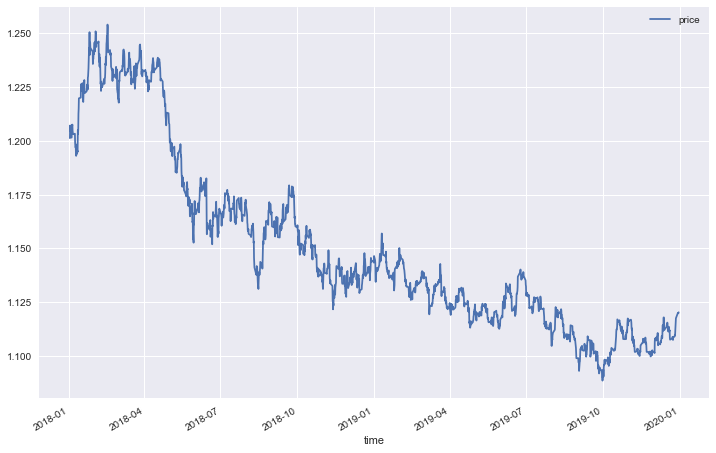

In [3]:
data.plot(figsize=(12,8))
plt.show()

In [4]:
data["returns"] = np.log(data.div(data.shift(1)))

# Define Mean-Reversion Strategy (BB)

In [5]:
SMA = 30
dev = 2

In [6]:
data["SMA"] = data["price"].rolling(SMA).mean()

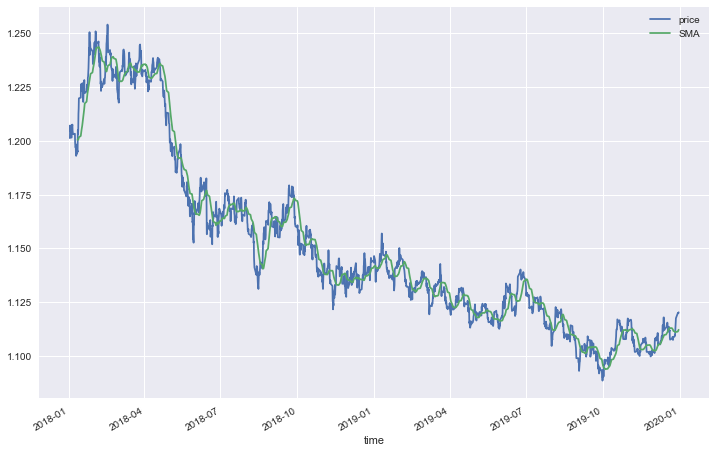

In [7]:
data[["price", "SMA"]].plot(figsize=(12,8))
plt.show()

In [8]:
data["price"].rolling(SMA).std()

time
2018-01-01 22:00:00+00:00         NaN
2018-01-02 04:00:00+00:00         NaN
2018-01-02 10:00:00+00:00         NaN
2018-01-02 16:00:00+00:00         NaN
2018-01-02 22:00:00+00:00         NaN
                               ...   
2019-12-29 22:00:00+00:00    0.003088
2019-12-30 04:00:00+00:00    0.003400
2019-12-30 10:00:00+00:00    0.003729
2019-12-30 16:00:00+00:00    0.004008
2019-12-30 22:00:00+00:00    0.004288
Name: price, Length: 2070, dtype: float64

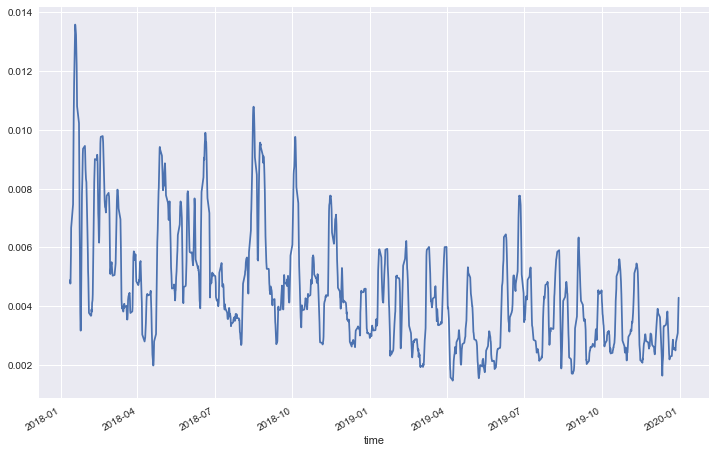

In [9]:
data["price"].rolling(SMA).std().plot(figsize=(12,8))
plt.show()

In [10]:
# Creating Upper and Lower band of bollinger bands 2 std away
data["lower"] = data["SMA"] - data["price"].rolling(SMA).std() * dev
data["upper"] = data["SMA"] + data["price"].rolling(SMA).std() * dev

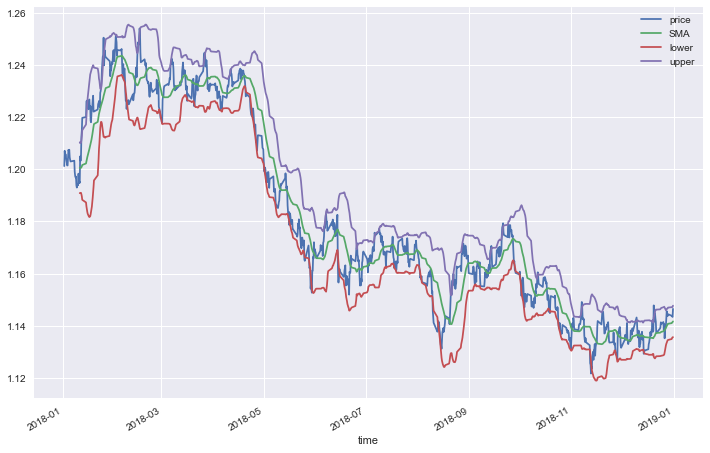

In [11]:
data["2018"][["price", "SMA", "lower", "upper"]].plot(figsize=(12,8))
plt.show()

In [12]:
data.dropna(inplace=True)

# Positions to Take

In [13]:
# Price below lower band --> Buy
# Price above SMA        --> Sell
# Price above upper      --> Short sell
# Price below SMA        --> Short buy

In [14]:
data.tail(50)

,price,returns,SMA,lower,upper
time,,,,,
2019-12-11 16:00:00+00:00,1.112990,0.004101,1.108174,1.104902,1.111446
2019-12-11 22:00:00+00:00,1.114375,0.001244,1.108417,1.104467,1.112367
2019-12-12 04:00:00+00:00,1.112760,-0.001450,1.108578,1.104329,1.112828
2019-12-12 10:00:00+00:00,1.111730,-0.000926,1.108715,1.104330,1.113100
2019-12-12 16:00:00+00:00,1.113085,0.001218,1.108872,1.104209,1.113535
2019-12-12 22:00:00+00:00,1.117765,0.004196,1.109190,1.103518,1.114862
2019-12-13 04:00:00+00:00,1.118025,0.000233,1.109517,1.103009,1.116026
2019-12-13 10:00:00+00:00,1.113550,-0.004011,1.109705,1.103063,1.116347
2019-12-13 16:00:00+00:00,1.112090,-0.001312,1.109867,1.103237,1.116496


In [15]:
# Is dist > 0 means price above SMA --> close long position
# Is dist < 0 means price below SMA --> close short position
data["distance"] = data["price"] - data["SMA"]   # Helper

In [16]:
data["position"] = np.where(data["price"] < data["lower"], 1, np.nan)
data["position"] = np.where(data["price"] > data["upper"], -1, data["position"])

In [17]:
# Cross over above or below SMA line
data["position"] = np.where(data["distance"] * data["distance"].shift(1) < 0, 0, data["position"])

In [18]:
data["position"] = data["position"].ffill().fillna(0)

In [19]:
data["position"].value_counts()

 0.0    919
 1.0    596
-1.0    526
Name: position, dtype: int64

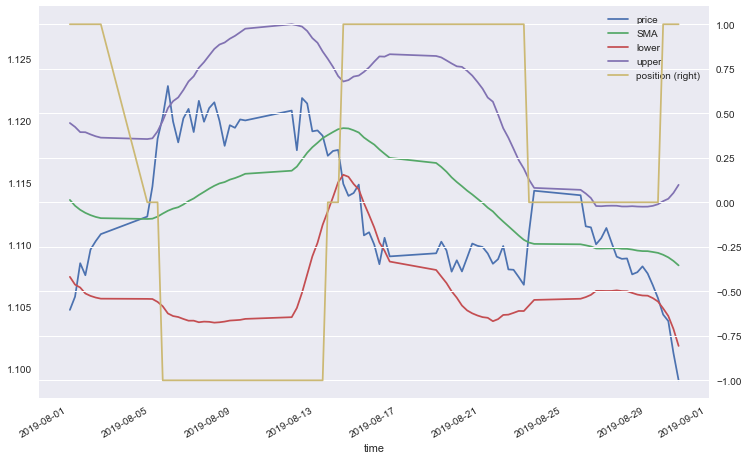

In [20]:
data["2019-08"].drop(columns=["returns", "distance"]).plot(figsize=(12,8), secondary_y="position")
plt.show()

# BackTesting

In [21]:
data['strategy'] = data['position'].shift(1) * data['returns']

In [24]:
data.dropna(inplace=True)

In [25]:
data['creturns'] = data['returns'].cumsum().apply(np.exp)
data['cstrategy'] = data['strategy'].cumsum().apply(np.exp)

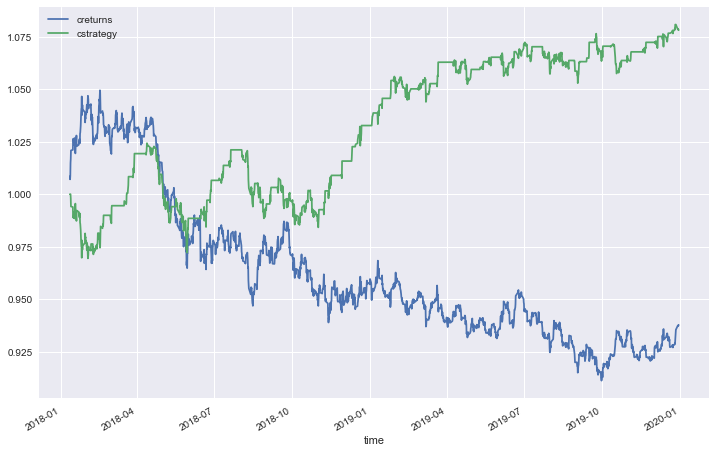

In [27]:
data[['creturns', 'cstrategy']].plot(figsize=(12,8))
plt.show()

# Analysis After Trading Costs